<a href="https://colab.research.google.com/github/akarsh0913/Practice-Deep-Learning/blob/main/Bi_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Input, concatenate
from sklearn.model_selection import train_test_split

In [ ]:
!unzip /content/drive/MyDrive/c2gw7fy2j4-1.zip -d /content/

Archive:  /content/drive/MyDrive/c2gw7fy2j4-1.zip
   creating: /content/scripts/
  inflating: /content/scripts/content_features.py  
  inflating: /content/scripts/external_features.py  
  inflating: /content/scripts/url_features.py  
  inflating: /content/scripts/feature_extractor.py  
  inflating: /content/scripts/allbrands.txt  
  inflating: /content/dataset_B_05_2020.csv  
  inflating: /content/dataset_A_05_2020_p1.pickle  


In [5]:
df = pd.read_csv('/content/dataset_B_05_2020.csv')
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [8]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['target_label'] = label_encoder.fit_transform(df['status'])

In [12]:
new_sfs = ['url',
'google_index',
'ratio_digits_url',
'domain_in_title',
'phish_hints',
'ip',
'nb_qm',
'length_url',
'nb_slash',
'length_hostname',
'nb_eq',
'ratio_digits_host',
'shortest_word_host',
'prefix_suffix',
'longest_word_path',
'tld_in_subdomain',
'empty_title',
'nb_dots',
'longest_words_raw',
'avg_word_path',
'avg_word_host',
'length_words_raw',
'avg_words_raw',
'nb_com',
'nb_at',
'longest_word_host',
'dns_record',
'https_token',
'nb_subdomains',
'shortening_service',
'ratio_extHyperlinks',
'tld_in_path',
'shortest_word_path',
'http_in_path',
'whois_registered_domain',
'web_traffic',
'nb_external_redirection',
'nb_underscore',
'nb_percent',
'nb_dollar',
'punycode',
'char_repeat', 'target_label'
]

In [13]:
dm_df = df[new_sfs]

In [35]:
adf = ['google_index',
'ratio_digits_url',
'domain_in_title',
'phish_hints',
'ip',
'nb_qm',
'length_url',
'nb_slash',
'length_hostname',
'nb_eq',
'ratio_digits_host',
'shortest_word_host',
'prefix_suffix',
'longest_word_path',
'tld_in_subdomain',
'empty_title',
'nb_dots',
'longest_words_raw',
'avg_word_path',
'avg_word_host',
'length_words_raw',
'avg_words_raw',
'nb_com',
'nb_at',
'longest_word_host',
'dns_record',
'https_token',
'nb_subdomains',
'shortening_service',
'ratio_extHyperlinks',
'tld_in_path',
'shortest_word_path',
'http_in_path',
'whois_registered_domain',
'web_traffic',
'nb_external_redirection',
'nb_underscore',
'nb_percent',
'nb_dollar',
'punycode',
'char_repeat']

In [70]:
len(adf)

41

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(dm_df[adf])
scaled_df = pd.DataFrame(scaled_features, columns=adf)
print(scaled_df)

       google_index  ratio_digits_url  domain_in_title  phish_hints   ip  \
0               1.0          0.000000              0.0          0.0  0.0   
1               1.0          0.304994              1.0          0.0  1.0   
2               1.0          0.208313              1.0          0.0  1.0   
3               0.0          0.000000              1.0          0.0  0.0   
4               0.0          0.000000              0.0          0.0  0.0   
...             ...               ...              ...          ...  ...   
11425           0.0          0.000000              0.0          0.0  0.0   
11426           1.0          0.032892              1.0          0.0  0.0   
11427           1.0          0.197349              0.0          0.0  1.0   
11428           0.0          0.000000              1.0          0.0  0.0   
11429           1.0          0.118740              1.0          0.3  1.0   

          nb_qm  length_url  nb_slash  length_hostname     nb_eq  ...  \
0      0.00000

In [73]:
features = ['google_index',
'ratio_digits_url',
'domain_in_title',
'phish_hints',
'ip',
'nb_qm',
'length_url',
'nb_slash',
'length_hostname',
'nb_eq',
'ratio_digits_host',
'shortest_word_host',
'prefix_suffix',
'longest_word_path',
'tld_in_subdomain',
'empty_title',
'nb_dots',
'longest_words_raw',
'avg_word_path',
'avg_word_host',
'length_words_raw',
'avg_words_raw',
'nb_com',
'nb_at',
'longest_word_host',
'dns_record',
'https_token',
'nb_subdomains',
'shortening_service',
'ratio_extHyperlinks',
'tld_in_path',
'shortest_word_path',
'http_in_path',
'whois_registered_domain',
'web_traffic',
'nb_external_redirection',
'nb_underscore',
'nb_percent',
'nb_dollar',
'punycode',
'char_repeat']

In [81]:
df2 = dm_df.copy()
df2.columns

Index(['url', 'google_index', 'ratio_digits_url', 'domain_in_title',
       'phish_hints', 'ip', 'nb_qm', 'length_url', 'nb_slash',
       'length_hostname', 'nb_eq', 'ratio_digits_host', 'shortest_word_host',
       'prefix_suffix', 'longest_word_path', 'tld_in_subdomain', 'empty_title',
       'nb_dots', 'longest_words_raw', 'avg_word_path', 'avg_word_host',
       'length_words_raw', 'avg_words_raw', 'nb_com', 'nb_at',
       'longest_word_host', 'dns_record', 'https_token', 'nb_subdomains',
       'shortening_service', 'ratio_extHyperlinks', 'tld_in_path',
       'shortest_word_path', 'http_in_path', 'whois_registered_domain',
       'web_traffic', 'nb_external_redirection', 'nb_underscore', 'nb_percent',
       'nb_dollar', 'punycode', 'char_repeat', 'target_label'],
      dtype='object')

In [82]:
temp_df2 = df2.drop('url', axis=1)
len(temp_df2.columns)

42

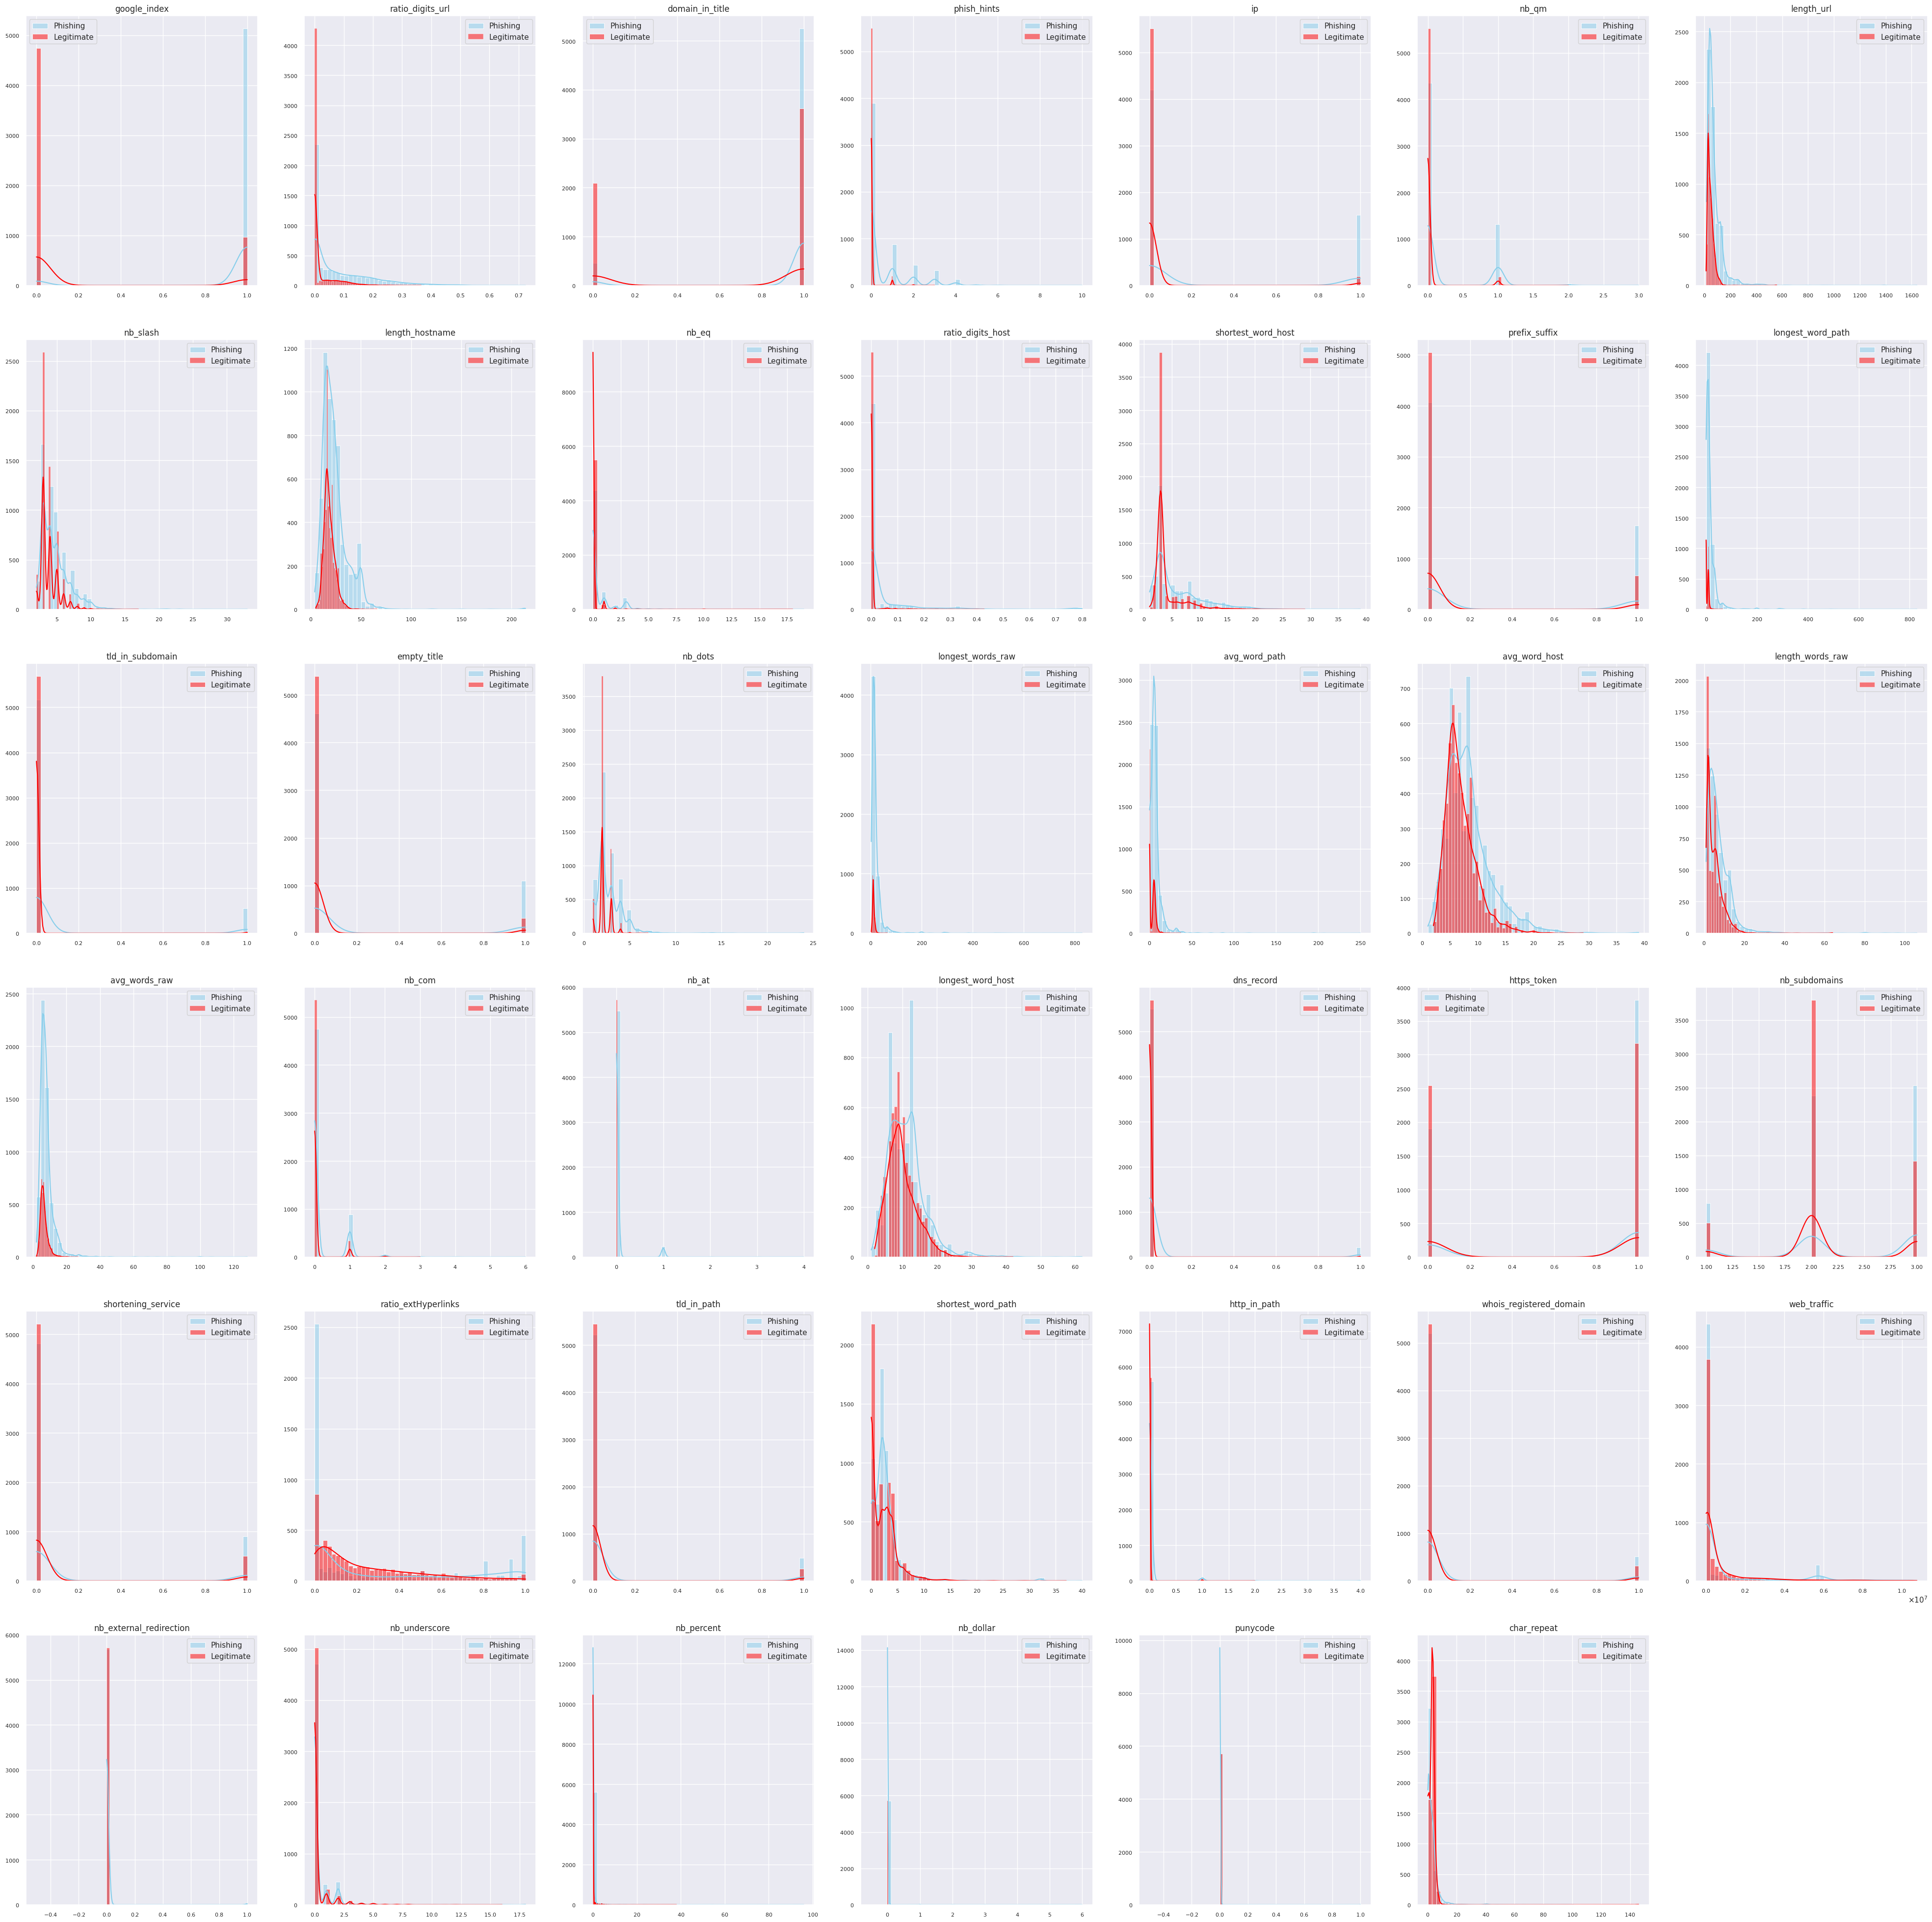

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="dark", rc={"axes.grid": True})

phishing_data = temp_df2[temp_df2['target_label'] == 1]
legitimate_data = temp_df2[temp_df2['target_label'] == 0]

num_features = len(features)
num_cols = 7
num_rows = (num_features + 1) // num_cols

fig, axs = plt.subplots(num_rows, num_cols, figsize=(50, 50))

axs = axs.flatten()

for i, feature in enumerate(features):
    ax = axs[i]
    sns.histplot(phishing_data[feature], bins=50, color="skyblue", ax=ax, label='Phishing', kde=True)
    print("\n")
    sns.histplot(legitimate_data[feature], bins=50, color="red", ax=ax, label='Legitimate', kde=True)
    print("\n")
    ax.set_title(feature)
    ax.legend()
    ax.set_xlabel("\n")
    ax.set_ylabel("\n")
    ax.tick_params(axis='both', which='both', labelsize=8)
    ax.xaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))
    ax.yaxis.set_major_formatter(plt.ScalarFormatter(useMathText=True))

for i in range(num_features, num_rows * num_cols):
    axs[i].axis('off')

plt.show()

In [85]:
correlation_matrix = temp_df2.corr()

print("Correlation of each feature with target_label:")
correlation_with_target = correlation_matrix['target_label'].sort_values(ascending=False)
for feature, correlation_value in correlation_with_target.iteritems():
    print(f"{feature}: {correlation_value}")

Correlation of each feature with target_label:
target_label: 1.0
google_index: 0.7311708381262626
ratio_digits_url: 0.3563945701626024
domain_in_title: 0.3428069729938348
phish_hints: 0.3353927377156508
ip: 0.3216977823874091
nb_qm: 0.2943190708457299
length_url: 0.24858046741991785
nb_slash: 0.2422699601753399
length_hostname: 0.23832240376368571
nb_eq: 0.23338630384578937
ratio_digits_host: 0.22433492719580636
shortest_word_host: 0.22308404240883373
prefix_suffix: 0.21468073790291617
longest_word_path: 0.21270911546421986
tld_in_subdomain: 0.20888415296656912
empty_title: 0.2070428078394182
nb_dots: 0.20702877302594608
longest_words_raw: 0.20014657829049398
avg_word_path: 0.19725610911780206
avg_word_host: 0.19350165239605555
length_words_raw: 0.19201047760965867
avg_words_raw: 0.16756371369746167
nb_com: 0.15628353122693384
nb_at: 0.1429145682495236
longest_word_host: 0.12451556744481343
dns_record: 0.1221189726384106
https_token: 0.11466906528633683
nb_subdomains: 0.112890729509671

<ipython-input-85-84dc86f12330>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for feature, correlation_value in correlation_with_target.iteritems():


<Axes: >

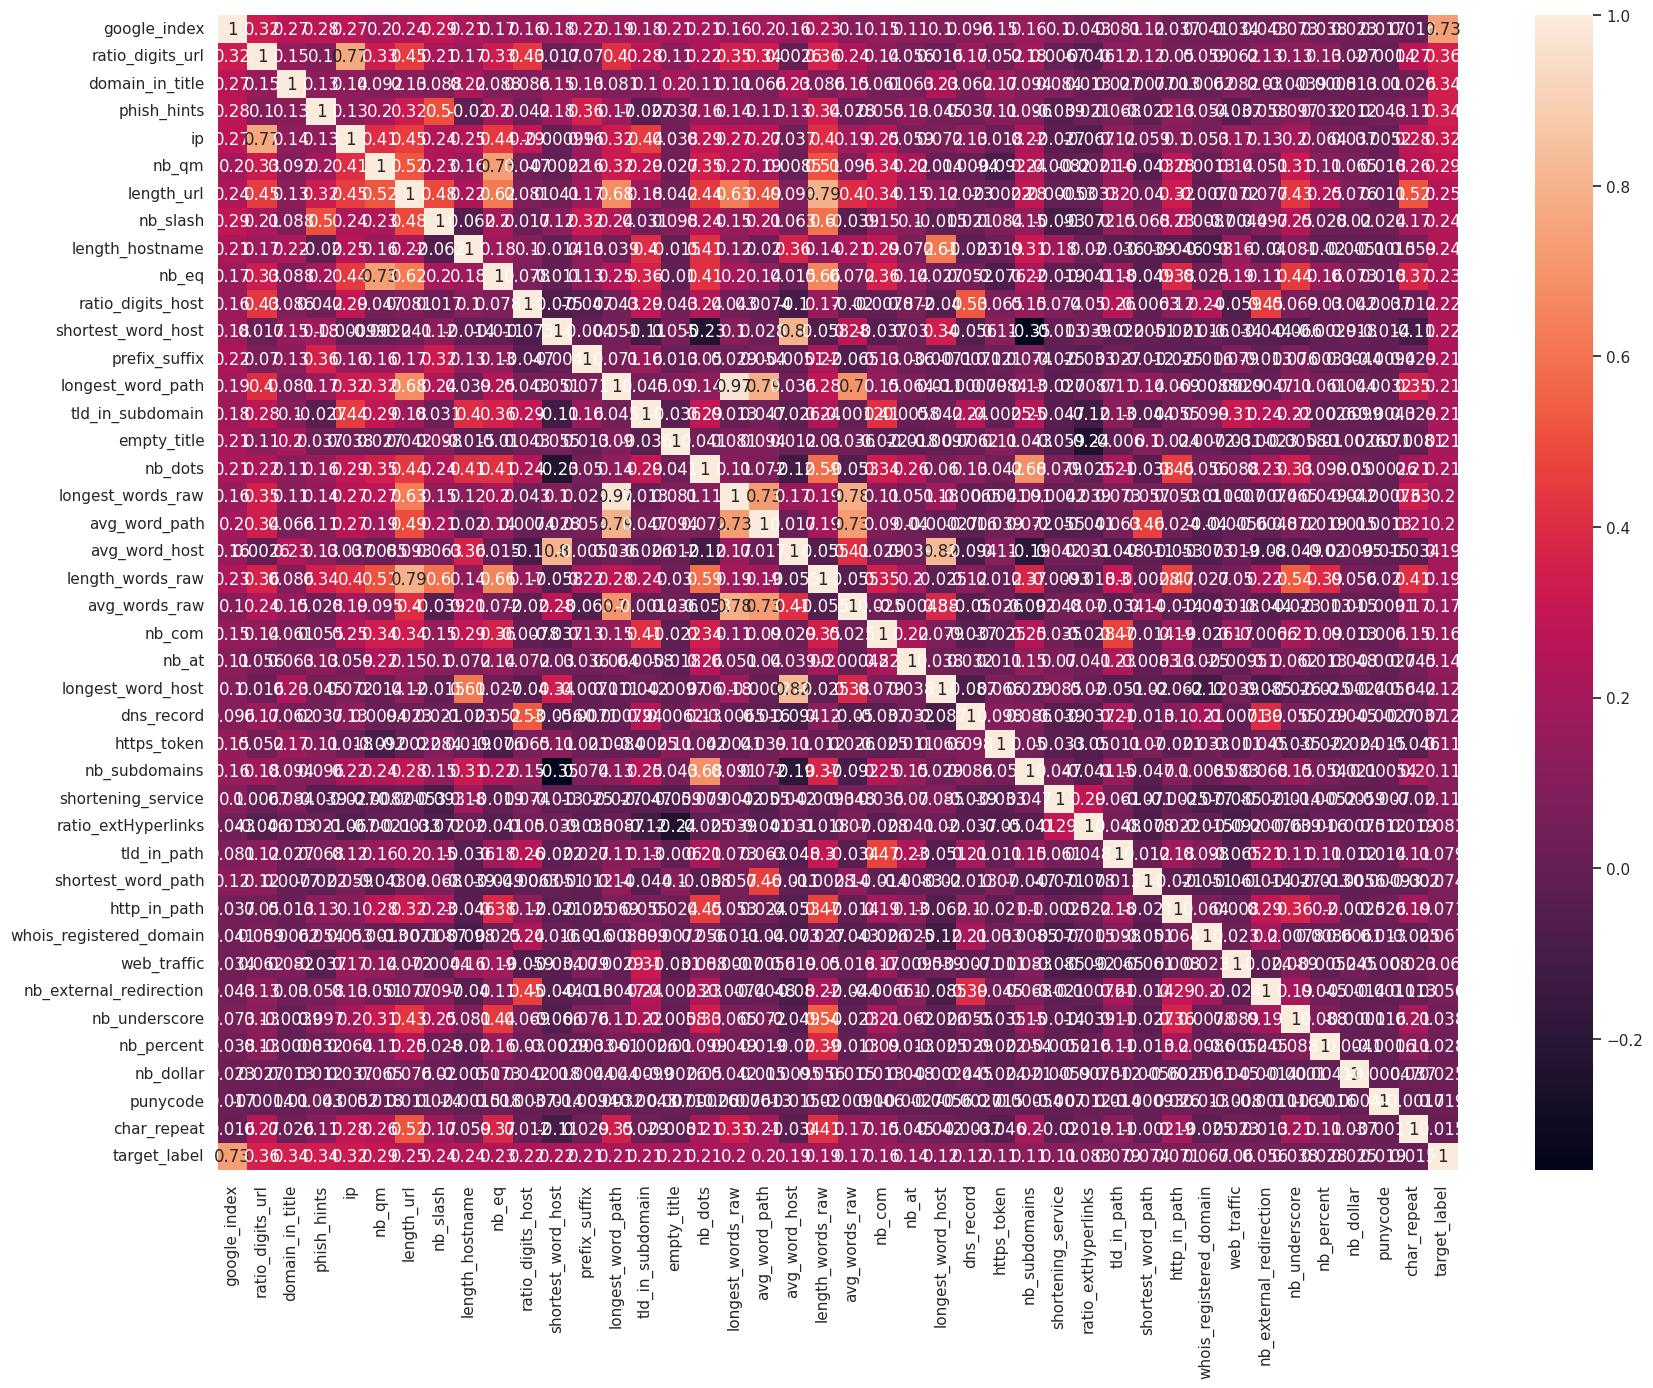

In [86]:
plt.figure(figsize = (20,15))
sns.heatmap(correlation_matrix, annot = True)

In [39]:
urls = dm_df['url'].values
additional_features = scaled_df[adf].values
labels = dm_df['target_label'].values

In [16]:
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(urls)
url_sequences = tokenizer.texts_to_sequences(urls)

In [19]:
max_sequence_length = 100  # Set the maximum sequence length
url_sequences_padded = pad_sequences(url_sequences, maxlen=max_sequence_length)

In [40]:
#X_train, X_test, y_train, y_test = train_test_split(url_sequences_padded, labels, test_size=0.2, random_state=42)

In [41]:
X_url_train, X_url_test, X_features_train, X_features_test, y_train, y_test = train_test_split(
    url_sequences_padded, additional_features, labels, test_size=0.2, random_state=42
)

In [44]:
url_input = Input(shape=(max_sequence_length,))
features_input = Input(shape=(X_features_train.shape[1],))

In [47]:
url_embedding = Embedding(len(tokenizer.word_index) + 1, 128, input_length=max_sequence_length)(url_input)
url_lstm = Bidirectional(LSTM(64))(url_embedding)

In [48]:
features_dense = Dense(64, activation='relu')(features_input)

In [49]:
merged = concatenate([url_lstm, features_dense])

In [50]:
output = Dense(1, activation='sigmoid')(merged)

In [55]:
model = Model(inputs=[url_input, features_input], outputs=output)

In [56]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [57]:
model.fit([X_url_train, X_features_train], np.array(y_train), epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
258/258 [==============================] - 26s 88ms/step - loss: 0.3848 - accuracy: 0.8274 - val_loss: 0.2807 - val_accuracy: 0.8656
Epoch 2/10
258/258 [==============================] - 21s 82ms/step - loss: 0.2306 - accuracy: 0.9106 - val_loss: 0.2116 - val_accuracy: 0.9202
Epoch 3/10
258/258 [==============================] - 22s 84ms/step - loss: 0.2057 - accuracy: 0.9211 - val_loss: 0.2025 - val_accuracy: 0.9191
Epoch 4/10
258/258 [==============================] - 20s 79ms/step - loss: 0.1960 - accuracy: 0.9244 - val_loss: 0.1969 - val_accuracy: 0.9246
Epoch 5/10
258/258 [==============================] - 21s 83ms/step - loss: 0.1838 - accuracy: 0.9322 - val_loss: 0.1857 - val_accuracy: 0.9301
Epoch 6/10
258/258 [==============================] - 22s 84ms/step - loss: 0.1831 - accuracy: 0.9302 - val_loss: 0.1807 - val_accuracy: 0.9355
Epoch 7/10
258/258 [==============================] - 21s 80ms/step - loss: 0.1742 - accuracy: 0.9351 - val_loss: 0.1733 - val_accuracy:

In [58]:
loss, accuracy = model.evaluate([X_url_test, X_features_test], np.array(y_test))
print("Test Accuracy:", accuracy)

72/72 [==============================] - 1s 20ms/step - loss: 0.1554 - accuracy: 0.9414
Test Accuracy: 0.9413823485374451


In [60]:
import numpy as np

# Randomly select an index from the test set
random_index = np.random.randint(0, len(X_test))

# Get a random URL sequence and additional features from the test set
random_url_sequence = X_url_test[random_index].reshape(1, -1)
random_features = X_features_test[random_index].reshape(1, -1)

decoded_url = tokenizer.sequences_to_texts(random_url_sequence)[0]

# Print the random URL and features
print("Random URL:", decoded_url)
print("Random Features:", random_features)

# Predict using the trained model
prediction = model.predict([random_url_sequence, random_features])

# Interpret the prediction
if prediction >= 0.5:
    print("Predicted: Phishing URL")
else:
    print("Predicted: Legitimate URL")

# Actual label from the test set
actual_label = y_test[random_index]

if actual_label == 1:
    print("Actual: Phishing URL")
else:
    print("Actual: Legitimate URL")

Random URL: h t t p : / / w w w . m y s o m e d a y i n m a y . c o m
Random Features: [[0.         0.         1.         0.         0.         0.
  0.01043585 0.         0.08571429 0.         0.         0.05263158
  0.         0.         0.         0.         0.04347826 0.01451028
  0.         0.19736842 0.00952381 0.05148515 0.         0.
  0.21311475 0.         1.         0.5        0.         0.85542169
  0.         0.         0.         0.         0.10282796 0.
  0.         0.         0.         0.         0.02054795]]
1/1 [==============================] - 0s 29ms/step
Predicted: Legitimate URL
Actual: Legitimate URL


In [62]:
import numpy as np

# Randomly select an index from the test set
random_index = np.random.randint(0, len(X_test))

# Get a random URL sequence and additional features from the test set
random_url_sequence = X_url_test[random_index].reshape(1, -1)
random_features = X_features_test[random_index].reshape(1, -1)

decoded_url = tokenizer.sequences_to_texts(random_url_sequence)[0]

# Print the random URL and features
print("Random URL:", decoded_url)
print("Random Features:", random_features)

# Predict using the trained model
prediction = model.predict([random_url_sequence, random_features])

# Interpret the prediction
if prediction >= 0.5:
    print("Predicted: Phishing URL")
else:
    print("Predicted: Legitimate URL")

# Actual label from the test set
actual_label = y_test[random_index]

if actual_label == 1:
    print("Actual: Phishing URL")
else:
    print("Actual: Legitimate URL")

Random URL: h t t p : / / r o t s e e z u n f t . c h . t c o r n e r . f r / h t t p s / / a d m i n . h o s t p o i n t . c h / 8 2 2 2 4 1 8 a 3 6 5 7 f 8 3 5 3 b d 4 d f c a b 8 4 5 1 2 9 8 /
Random Features: [[1.         0.34536082 1.         0.1        1.         0.
  0.04910988 0.16129032 0.1        0.         0.         0.02631579
  0.         0.03860072 0.         1.         0.17391304 0.0362757
  0.0424     0.14912281 0.06666667 0.05643564 0.         0.
  0.16393443 0.         1.         1.         0.         0.
  0.         0.05       0.25       0.         0.         0.
  0.         0.         0.         0.         0.03424658]]
1/1 [==============================] - 0s 20ms/step
Predicted: Phishing URL
Actual: Phishing URL


In [63]:
import numpy as np

# Randomly select an index from the test set
random_index = np.random.randint(0, len(X_test))

# Get a random URL sequence and additional features from the test set
random_url_sequence = X_url_test[random_index].reshape(1, -1)
random_features = X_features_test[random_index].reshape(1, -1)

decoded_url = tokenizer.sequences_to_texts(random_url_sequence)[0]

# Print the random URL and features
print("Random URL:", decoded_url)
print("Random Features:", random_features)

# Predict using the trained model
prediction = model.predict([random_url_sequence, random_features])

# Interpret the prediction
if prediction >= 0.5:
    print("Predicted: Phishing URL")
else:
    print("Predicted: Legitimate URL")

# Actual label from the test set
actual_label = y_test[random_index]

if actual_label == 1:
    print("Actual: Phishing URL")
else:
    print("Actual: Legitimate URL")

Random URL: h t t p : / / w w w . d o s b o x . c o m / w i k i / s o f t w a r e
Random Features: [[0.         0.         0.         0.         0.         0.
  0.01411909 0.06451613 0.04761905 0.         0.         0.05263158
  0.         0.00965018 0.         0.         0.04347826 0.00725514
  0.024      0.09210526 0.02857143 0.02574257 0.         0.
  0.08196721 0.         1.         0.5        1.         0.02105263
  0.         0.1        0.         0.         0.01116513 0.
  0.         0.         0.         0.         0.02054795]]
1/1 [==============================] - 0s 21ms/step
Predicted: Legitimate URL
Actual: Legitimate URL


In [65]:
import numpy as np

# Randomly select an index from the test set
random_index = np.random.randint(0, len(X_test))
print(random_index)
# Get a random URL sequence and additional features from the test set
random_url_sequence = X_url_test[random_index].reshape(1, -1)
random_features = X_features_test[random_index].reshape(1, -1)

decoded_url = tokenizer.sequences_to_texts(random_url_sequence)[0]

# Print the random URL and features
print("Random URL:", decoded_url)
print("Random Features:", random_features)

# Predict using the trained model
prediction = model.predict([random_url_sequence, random_features])

# Interpret the prediction
if prediction >= 0.5:
    print("Predicted: Phishing URL")
else:
    print("Predicted: Legitimate URL")

# Actual label from the test set
actual_label = y_test[random_index]

if actual_label == 1:
    print("Actual: Phishing URL")
else:
    print("Actual: Legitimate URL")

2235
Random URL: h t t p : / / p u m p - o n e . c o m / w p - a d m i n / u s e r / o u t / o f f i c e
Random Features: [[1.         0.         1.         0.2        0.         0.
  0.01964395 0.12903226 0.03809524 0.         0.         0.05263158
  1.         0.00723764 0.         1.         0.         0.00483676
  0.016      0.06578947 0.05714286 0.01471004 0.         0.
  0.04918033 0.         1.         0.         0.         0.
  0.         0.05       0.         0.         0.         0.
  0.         0.         0.         0.         0.00684932]]
1/1 [==============================] - 0s 22ms/step
Predicted: Phishing URL
Actual: Phishing URL


In [66]:
df.iloc[2235]

url                https://623112j4j3.codesandbox.io/xrr/
length_url                                             38
length_hostname                                        25
ip                                                      0
nb_dots                                                 2
                                    ...                  
dns_record                                              0
google_index                                            1
page_rank                                               6
status                                           phishing
target_label                                            1
Name: 2235, Length: 90, dtype: object

In [69]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from keras.callbacks import History

y_pred = (model.predict([X_url_test, X_features_test]) >= 0.5).astype(int)

# Compute confusion matrix and print it
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

72/72 [==============================] - 2s 20ms/step
Confusion Matrix:
[[1091   66]
 [  68 1061]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1157
           1       0.94      0.94      0.94      1129

    accuracy                           0.94      2286
   macro avg       0.94      0.94      0.94      2286
weighted avg       0.94      0.94      0.94      2286



In [51]:
#model = Sequential()
#model.add(Embedding(len(tokenizer.word_index) + 1, 128, input_length=max_sequence_length))
#model.add(Bidirectional(LSTM(64)))
#model.add(Dense(1, activation='sigmoid'))

In [52]:
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
#import numpy as np
#model.fit(np.array(X_train), np.array(y_train), epochs=10, batch_size=32, validation_split=0.1)